# Analysing Genuine files in dev set - version 1.0 dataset

## TODO

 * Draw scatter plot of posteriors for our best CNN system to project the distribution of genuine and spoofed features
 * Do this for Development and evaluation set.
 * On Evaluation set you could do this plot seperately for different Replay configurations (total 57 will be too much though)

# Summary of file list for spoofed and genuine files in Development set for analysis

## 1) The top 10 genuine confident correctly classified files : high scores

                               Gen prob     Spf Prob      Log Liklihood ratio
    



In [144]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

In [145]:
# Load the prediction file
# Predictions file that has three columns: genuin, spoofed prob and log likehood ratio

pred_file='model_3sec_relu_0.5_run9/predictions/dev_prediction.txt'

In [146]:
all_predictions = []
all_gens = []
all_spoofs = []

with open(pred_file) as f:
    all_predictions = [line.strip() for line in f]
    
all_gen_predictions = all_predictions[:760]                    # first 760 files in dev are genuine
all_spf_predictions = all_predictions[760:]                  # files from 761-1710 are spoofed examples

In [147]:
all_scores = []

with open(pred_file) as f:
    all_scores = [line.strip().split(' ')[2] for line in f]
    
all_gen_scores = all_scores[:760]
all_spf_scores = all_scores[760:]

In [148]:
print(len(all_gen_scores))
print(len(all_spf_scores))

760
950


### Sort the genuine indexes

In [149]:
gen_sort_index = np.argsort(all_gen_scores)
gen_sort_index = gen_sort_index[::-1]        # reverse it in descending order

In [150]:
# Get count of all genuine files that score > 0.5 and put it in a list with following format
# file_idx genProb spfProb score

fname='index_file_list/allGenIndexList_TP.txt'
f=open(fname,'w')
count=0
for i in gen_sort_index:    #[0:10]:
    score= all_gen_predictions[i].strip().split(' ')[2]
    if float(score) > 0.5:
        f.write((str(i) + ' ' + str(all_gen_predictions[i]) + '\n'))        
        count += 1
print('Total count = ',count)
f.close()

Total count =  734


## 1) Take the top 10 genuine confident correctly classified files - high scores

                               Gen prob     Spf Prob      Log Liklihood ratio
    
       
**** Note when accessing via list or array, index 575 should be called as 574       

In [151]:
top10_lowest = gen_sort_index[::-1]

for i in top10_lowest[0:20]:
    print('Dev file index: ' + str(i+1) + ' ' + str(all_gen_predictions[i]))    

Dev file index: 113 0.498099 0.501902 -0.00760597
Dev file index: 31 0.497005 0.502994 -0.0119781
Dev file index: 83 0.484129 0.515871 -0.0635039
Dev file index: 12 0.438658 0.561342 -0.24661
Dev file index: 283 0.438143 0.561857 -0.248701
Dev file index: 89 0.418306 0.581694 -0.329731
Dev file index: 91 0.390539 0.609461 -0.445047
Dev file index: 282 0.386574 0.613426 -0.461736
Dev file index: 101 0.373999 0.626001 -0.515101
Dev file index: 199 0.369888 0.630112 -0.532699
Dev file index: 515 0.318364 0.681636 -0.761301
Dev file index: 285 0.292513 0.707487 -0.883209
Dev file index: 517 0.286418 0.713581 -0.912843
Dev file index: 90 0.218112 0.781888 -1.27671
Dev file index: 289 0.118397 0.881603 -2.0077
Dev file index: 284 0.107458 0.892542 -2.11697
Dev file index: 290 0.0924305 0.90757 -2.28431
Dev file index: 5 0.0818827 0.918117 -2.41704
Dev file index: 82 0.0667096 0.93329 -2.63837
Dev file index: 286 0.0622482 0.937752 -2.71236


## 2) Take the top 10 genuine confidently misclassified files - low scores

                                     Gen prob     Spf Prob      Log Liklihood ratio
              
               
##### Note when accessing via list or array, index 113 should be called as 112                   

## Analysing Time: The top two components from SLIME - True positive Genuine case

Note, that under time analysis, we have cut our input spectrogram into 10 different temporal components/segments, where each segment correpsonds to

> ***300 mili seconds***

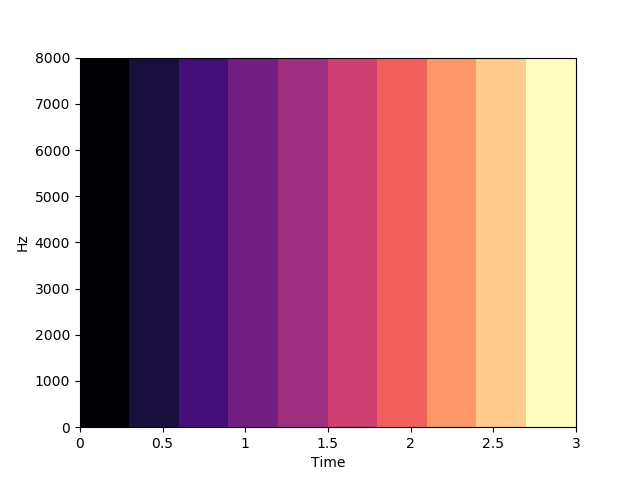

In [152]:
# Show how we cut the spectrogram in timexfrequency

Image("time.png")

In [153]:
file = 'top_two_explanation_indices/time/gen_TP.txt'

In [154]:
def get_top1_top2_list(file):
    with open(file) as f:
        top1 = [int(line.strip().split(' ')[0]) for line in f]
    with open(file) as f:  
        top2 = [int(line.strip().split(' ')[1]) for line in f]
    return top1, top2    

In [155]:
# Get top1 and top2 in seperate list
top1, top2 = get_top1_top2_list(file)

In [156]:
print(len(top1))
print(len(top2))

734
734


In [157]:
def get_counts(datalist, key):
    count=0
    for i in range(0,len(datalist)):
        if datalist[i] == key:
            count+=1
    return count            

In [158]:
def print_component_distribution(comps, predList, order):
    print('Printing component weigting distribution for Top:', order)
    for i in comps:
        print('Component ' + str(i) + ' : ' + str(get_counts(predList, i)))    

### Using the top1 components - given by SLIME (Time segmentation)

> For ***run1*** we get following distribution:

    Component 0 : 307
    Component 1 : 1
    Component 2 : 67
    Component 3 : 185
    Component 4 : 110
    Component 5 : 43
    Component 6 : 15
    Component 7 : 6
    Component 8 : 0
    Component 9 : 0
    
    
>It proves our hypothesis and also supports correctness our hypothesis. **SLIME is giving us correct explanations**. As, we know that genuine files has zero-valued silence frames in the beginning that model expolits. Here, highest weightage is given to first 300ms signal !!    



In [159]:
comps=[0,1,2,3,4,5,6,7,8,9]    # In time we have 10 segments/components

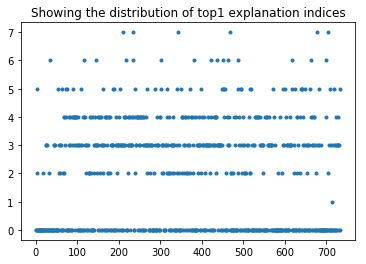

In [160]:
plt.title('Showing the distribution of top1 explanation indices')
plt.plot(top1,'.')

In [161]:
# Print distribution on top1
order = 1
print_component_distribution(comps, top1, order)

Printing component weigting distribution for Top: 1
Component 0 : 307
Component 1 : 1
Component 2 : 67
Component 3 : 185
Component 4 : 110
Component 5 : 43
Component 6 : 15
Component 7 : 6
Component 8 : 0
Component 9 : 0


### Using the top2 components - given by SLIME (Time segmentation)

> For ***Run1*** we get following distribution

    Component 0 : 68
    Component 1 : 22
    Component 2 : 90
    Component 3 : 199
    Component 4 : 208
    Component 5 : 74
    Component 6 : 42
    Component 7 : 22
    Component 8 : 0
    Component 9 : 9

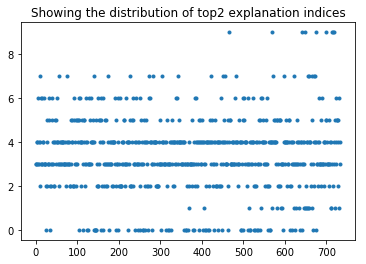

In [162]:
plt.title('Showing the distribution of top2 explanation indices')
plt.plot(top2,'.')

In [163]:
# Print distribution on top2

order = 2
print_component_distribution(comps, top2, order)

Printing component weigting distribution for Top: 2
Component 0 : 68
Component 1 : 22
Component 2 : 90
Component 3 : 199
Component 4 : 208
Component 5 : 74
Component 6 : 42
Component 7 : 22
Component 8 : 0
Component 9 : 9


**Observation**

> Out of 764 genuine files that were correctly classified with probability > 90% as genuine, our SLIME explains that the highest/top component influencing this is the first 300ms (which supports our results, as the first few ms has zero values samples). 


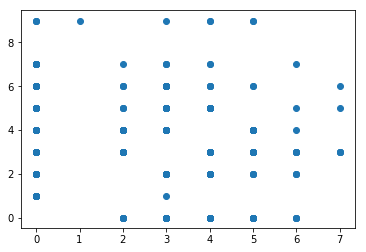

In [164]:
# Just a quick scatter plot

plt.scatter(top1, top2)

In [165]:
# Get those file index having component0 in top explanation: put it in key variable

key=0

fname='index_file_list/allGenIndexList_TP.txt'
with open(fname) as f:
    #file_idxs = [int(line.strip().split(' ')[0]) for line in f]
    file_idxs = [line.strip() for line in f]
    
    
# Write the top component index to the file and further analysis
#fname='topExplanation_list_Genuine_TP.txt'
fname='top_two_explanation_indices/time/topExplanation_list_gen_TP.txt'
id4_indexFiles=list() 

f=open(fname,'w')
for i in range(len(top1)):
    if top1[i]==key:    # if top explanation index is 3 (which is actually 4)
        id4_indexFiles.append(file_idxs[i])
        f.write(str(file_idxs[i])+'\n')
        
f.close()

In [166]:
%%bash
cat 'top_two_explanation_indices/time/topExplanation_list_gen_TP.txt' | head

574 0.999954 4.55669e-05 9.99628
570 0.999954 4.56602e-05 9.99424
621 0.99995 5.00916e-05 9.90161
626 0.999947 5.27098e-05 9.85066
618 0.999947 5.3097e-05 9.84334
586 0.99994 5.95998e-05 9.7278
571 0.99994 6.04382e-05 9.71383
649 0.999939 6.10599e-05 9.70359
592 0.999939 6.11216e-05 9.70258
627 0.999938 6.1763e-05 9.69214


### Note: 
> the file topExplanation_list_gen_TP.txt will have four columns
> The first column denotes file index (index from 0), second and third specifies genuine and spoofed probability, while last specifies the LLR score

### What have we done so far

 1. We took all genuine files that were correctly classified by CNN. All these files were confidently classified with > 90% probability by the genuine class. In total we get 764 such genuine TP audio files.
 1. Then we applied SLIME. We segmented along time. We partitioned these files in 10 parts, each of 300ms. We then obtained top 2 influencing component index for all these 764 files.
 1. We then analysed the explanation index distribution for these 764 files and find that the component 0 that corresponds to first 300ms audio are maximally activated (got highest count = 307/764)
 1. Then we take these 307 audio file index and plot their spectrograms and try to find similarity.


## Analysing Freq: The top two components from SLIME - True positive Genuine case

Note, that under frequency analysis, we have cut our input spectrogram into 8 different frequency components/segments, where each segment correpsonds to

> ***1000 Hz frequency***

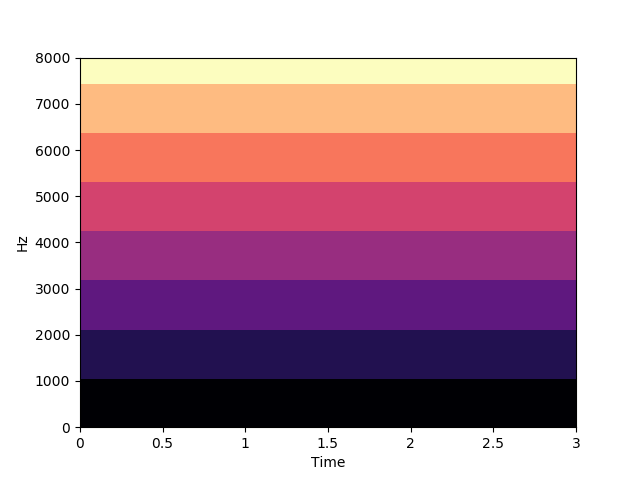

In [167]:
# Show how we cut the spectrogram in timexfrequency

Image("frequency.png")

In [168]:
file = 'top_two_explanation_indices/freq/gen_TP.txt'

In [169]:
%%bash
cat 'top_two_explanation_indices/freq/gen_TP.txt' | head

# the top two components 7 6 dominates the explanation

7 6
7 6
7 6
7 0
7 6
7 0
7 6
7 6
7 6
7 6


In [170]:
# Get top1 and top2 in seperate list
top1, top2 = get_top1_top2_list(file)

In [171]:
print(len(top1))
print(len(top2))

734
734


## Top 1 component distribution - Frequency

In [172]:
comps = [0,1,2,3,4,5,6,7]   # in Frequency we have 8 components

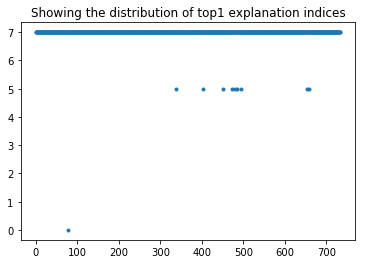

In [173]:
plt.title('Showing the distribution of top1 explanation indices')
plt.plot(top1,'.')

In [174]:
# Print distribution on top1

order = 1
print_component_distribution(comps, top1, order)

Printing component weigting distribution for Top: 1
Component 0 : 1
Component 1 : 0
Component 2 : 0
Component 3 : 0
Component 4 : 0
Component 5 : 9
Component 6 : 0
Component 7 : 724


## Top 2 component distribution - Frequency

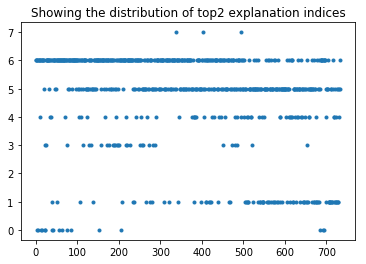

In [175]:
plt.title('Showing the distribution of top2 explanation indices')
plt.plot(top2,'.')

In [176]:
# Print distribution on top2

order = 2
print_component_distribution(comps, top2, order)

Printing component weigting distribution for Top: 2
Component 0 : 17
Component 1 : 83
Component 2 : 0
Component 3 : 30
Component 4 : 58
Component 5 : 229
Component 6 : 314
Component 7 : 3


In [177]:
# Get those file index having component8 in top explanation (as for frequency we get top explanation at index8)
top = 7

fname='index_file_list/allGenIndexList_TP.txt'
with open(fname) as f:
    #file_idxs = [int(line.strip().split(' ')[0]) for line in f]
    file_idxs = [line.strip() for line in f]
    
#Write the top component index to the file and further analysis
fname='top_two_explanation_indices/freq/topExplanation_list_gen_TP.txt'
id8_indexFiles=list() 

f=open(fname,'w')
for i in range(len(top1)):
    if top1[i]==top:    # if top explanation index is 3 (which is actually 4)
        id8_indexFiles.append(file_idxs[i])
        f.write(str(file_idxs[i])+'\n')
        
f.close()

** Observations**

> We find that frequency **component 8 corresponding to 7000-8000 Hz**, seems to get maximally activated for making the prediction. Still, its hard to make any signifant conclusion about a class.

> It seems that the genuine class of our network is ***heavily relying on cues at high frequency (7000-8000Hz)***, this also matches to our results for Version 2.0 dataset, where we see similar pattern for genuine class. This could relate to the fact about how the original RedDots data was collected? May be it had lot of noise conditions, but when it was replayed back passing through various channels: playback, recording device and environment, the signal at high frequency kindof get distorted ... (not sure what I am saying .. re-write)


## Analysing timexFreq: The top two components from SLIME - True positive Genuine case

Note, that under timexfrequency analysis, we have cut our input spectrogram into 30 different segments, where each segment correpsonds to

> ***600 msec in time and around 1333 Hz in frequency***

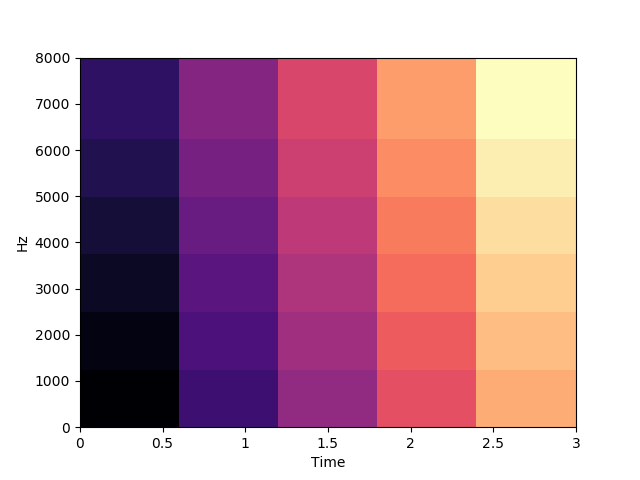

In [178]:
# Show how we cut the spectrogram in timexfrequency

Image("timexfrequency.png")

In [179]:
file = 'top_two_explanation_indices/tf/gen_TP.txt'

In [180]:
%%bash
cat 'top_two_explanation_indices/tf/gen_TP.txt' | grep 11 | wc -l
#cat 'top_two_explanation_indices/tf/gen_TP.txt' 

# on v1.0
# the indexes 11,23 and 17 seems to be appearing mostly 
# Index 11 occuring - 544 times (in top2)
# Index 23 occurs 220 times in top2 pair
# Index 17 appears 466 times in top2 pair

# the indexes 11,23 and 17 seems to be appearing mostly    : This was on v2.0 dataset
# Index 11 occuring - 498 times (in top2)
# Index 23 occurs 204 times in top2 pair
# Index 17 appears 394 times in top2 pair

544


#### quick note

>  Along timexfrequency analysis, the indexes 11,23 and 17 seems to be appearing mostly, where,

 1. Index 11 occuring - 544 times (in top2)
 1. Index 17 appears 466 times in top2 pair
 1. Index 23 occurs 220 times in top2 pair
   
** Note ** Indexes starts with 0, so 11 here is 12th component 

> Note we ***observe similar kindof pattern as we found on v2.0 database*** for txf analysis. The top1 is for 11 component (occurs 498 times).

In [181]:
# Get top1 and top2 in seperate list
top1, top2 = get_top1_top2_list(file)
print(len(top1))
print(len(top2))

734
734


## Top 1 component distribution - time x Frequency

In [182]:
comps = np.arange(0,30)   # in timexfrequency we have 30 components

In [183]:
# Print distribution on top1

order = 1
print_component_distribution(comps, top1, order)

Printing component weigting distribution for Top: 1
Component 0 : 38
Component 1 : 0
Component 2 : 0
Component 3 : 1
Component 4 : 20
Component 5 : 1
Component 6 : 0
Component 7 : 0
Component 8 : 0
Component 9 : 1
Component 10 : 10
Component 11 : 364
Component 12 : 0
Component 13 : 0
Component 14 : 0
Component 15 : 0
Component 16 : 0
Component 17 : 215
Component 18 : 0
Component 19 : 0
Component 20 : 0
Component 21 : 0
Component 22 : 0
Component 23 : 75
Component 24 : 0
Component 25 : 0
Component 26 : 0
Component 27 : 0
Component 28 : 0
Component 29 : 9


## Top 2 component distribution - time x Frequency

In [184]:
# Print distribution on top2

order = 2
print_component_distribution(comps, top2, order)

Printing component weigting distribution for Top: 2
Component 0 : 32
Component 1 : 0
Component 2 : 0
Component 3 : 1
Component 4 : 53
Component 5 : 9
Component 6 : 0
Component 7 : 3
Component 8 : 0
Component 9 : 0
Component 10 : 13
Component 11 : 180
Component 12 : 0
Component 13 : 0
Component 14 : 0
Component 15 : 0
Component 16 : 5
Component 17 : 251
Component 18 : 0
Component 19 : 0
Component 20 : 0
Component 21 : 1
Component 22 : 0
Component 23 : 145
Component 24 : 0
Component 25 : 0
Component 26 : 0
Component 27 : 0
Component 28 : 1
Component 29 : 40


**Observations**

> It seems that under timexfrequency analysis, considering 764 genuine audio files in development set that were classified correctly with probability > 90% the decision is highly influenced for ***Components 11,17 and 23.*** This holds true for top1 and top2 explanations.

# Overall Summary for Genuine class - on the v1.0 database

**Time segmentation**

> The highest influence is for first 300 ms. This supports and prove the correctness of our hypothesis, explanations given by SLIME too.

**Frequency segmentation**
> The top explanation favours to the highest frequency bin (8000hz)/. Out of 764 TP genuine examples we get 724 votes for component 7(corresponding to 8000Hz). This suggest that the genuine class is highly influenced by higher frequency.

> ***This is a bit surprising though as I was expecting this behaviour for spoofed cases.*** However, we see similar pattern for frequency under both v1.0 and v2.0 **which is good !**

**TimexFrequency segmentation**
> We find that the components 11 and 17 are highly contributing in prediction. Component 11 receives highest vote, and it represents time between 0.6-1.2s and frequency above 6000Hz.
 

# Overall Summary for Genuine class - on the v2.0 database

**Time segmentation**

>We segmented spectrogram into 10 super-samples (components), each of 1000ms, and ran SLIME to generate explanations using 5000 samples. We find that among 766 True-positive genuine files (with score > 0.5), the highest influence is shown for component 4 that corresponds to 4000ms.

**Question:** What is there in 4000ms (0.4 seconds)? may be onset ? where speech begins? Need to listen to few audio files and confirm this.

**Frequency segmentation**
> We segmented the spectrograms into 8 different frequency bins, each corresponding to 1000Hz and ran SLIME. In this case, the top explanation favours to the highest frequency bin (8000hz)/. Out of 766 TP genuine examples we get 656 corresponding to bin 8 (8000Hz). This suggest that the genuine class is highly influenced by higher frequency.

> ***This is a bit surprising though as I was expecting this behaviour for spoofed cases.***

**TimexFrequency segmentation**
> We segmented the spectrogram into 30 different timexfrequency bins. We chose 30 to keep our analysis simple. Each component corresponds to 600 msec in time and around 1333 Hz in frequency. Here, we find that the components 11 and 17 are highly contributing in prediction. Component 11 corresponds to 
 